# Project 2 : Investigate a DataSet

## Table of Contents,
<ul>,
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Selecting the dataset

For this project, I chose the TMDb dataset which contains a lot of informations regarding movies during years (1960-2015). A lot of informations is contained in this CSV (Director, Year of publish, Budget, Revenue, Popularity, Votes, Genre, aso...) for a big lot of movies (~10K).

## What kind of answer could we seek into all those datas ?

1. How are represented genres through decades ?

2. Are there any movie which were bad investment ?

3. What are the 5th most profitable movie ever ( Revenue - Cost ) ?

4. How the profit made by movies evolve through the year ?

---

<a id='wrangling'></a>
## Data Wrangling / Data Cleansing

Lot of dataset need to be evaluate and cleaned before being able to deal with their datas. Let's have a look into this dataset.

In [299]:
# Import libraries and load dataset
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Let's get maximum informations about the dataset we are analysing

In [301]:
# What size is my sample ?
rows, cols = df.shape

In [302]:
print('So the dataset contains **21 columns** and **10866 rows**'.format(cols, rows))

So the dataset contains **21 columns** and **10866 rows**


In [267]:
# Which type are every columns ?
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

So we have a lot of colums:
 * some numericals (id, budget, revenue, popularity, runtime, vote_count, vote_average, release_year, budget adjusted and revenue adjusted)
 * some strings (imdb_id, original_title, cast, homepage, director, tagline, keywords, overview, genres, production_companies, release_date)

In [303]:
# Looking for existing data (non-null) through the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

By the look of this representation, we may have to remove some datas from the dataset because they do not seem relevant like (homepage (only 25% of fillness), tagline & overview (description fields, not really usefull in the study here), id and imdb_id 

In [269]:
# Cleaning out some columns bases on the index we can retrieve thanks to the info() function
ind = df.columns[np.r_[2:6,8,10,12:20]]
df = df[ind]
df.head()

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08
4,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08


Let seek if by any chance there are duplicate entries

In [270]:
sum(df.duplicated())

1

It seems that there is a single duplicate entry, we'll clean it out from the dataset

In [271]:
df.drop_duplicates(inplace=True)

Lets look for distribution of datas for every fields

In [272]:
df.nunique()

popularity              10814
budget                    557
revenue                  4702
original_title          10571
director                 5067
keywords                 8804
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
dtype: int64

Lets analyse now the data contained in order to find outlers, unusable datas, N/A

In [273]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08


Some datas needs to be cleaned out like revenue, budget, runtime, popularity to 0 (for popularity, it looks like a percentage, so, we'll clean out all datas not greater or equal than 0.01)

In [274]:
# Cleaning Revenue values equals to 0
mask_revenue = df['revenue'] > 0.0
df = df[mask_revenue]

# Removing rows with runtime values equals to 0
mask_runtime = df['runtime'] > 0.0
df = df[mask_runtime]

# Removing rows with popularity values equals to 0
mask_popularity = df['popularity'] >= 0.01
df = df[mask_popularity]

# Removing rows with budget values equals to 0 (is that even possible to build a movie for nothing ?)
mask_budget = df['budget'] > 0.0
df = df[mask_budget]

df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj
count,3853.000000,3.853000e+03,3.853000e+03,3853.000000,3853.000000,3853.000000,3853.000000,3.853000e+03
mean,1.191863,3.721326e+07,1.077137e+08,109.226577,527.851285,6.168103,2001.260317,4.425137e+07
std,1.475229,4.220953e+07,1.765543e+08,19.921583,880.033452,0.795015,11.283953,4.480950e+07
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01
25%,0.462609,1.000000e+07,1.360940e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07
50%,0.797723,2.400000e+07,4.480678e+07,106.000000,204.000000,6.200000,2004.000000,3.001664e+07
75%,1.368403,5.000000e+07,1.242721e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08


Transforming release_date from string to datetime

In [275]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [277]:
rows, cols = df.shape
print('There is still {} rows and {} cols to deal with'.format(rows, cols))

There is still 3853 rows and 14 cols to deal with


###### All dataset is now ready to be used to answer all the questions we may have

---
<a id="eda"></a>

### How are represented genres through decades ?

First of all, we will add a new column representing decades from the release_year column

In [305]:
df['decade']=df['release_year'] - df['release_year'] % 10

In [306]:
# Building a dataset with only 2 columns "Decade" and "Genre" (and dropping N/A datas)
gf=df[['decade', 'genres']].dropna()

In [307]:
gf.head()

,decade,genres
0,2010,Action|Adventure|Science Fiction|Thriller
1,2010,Action|Adventure|Science Fiction|Thriller
2,2010,Adventure|Science Fiction|Thriller
3,2010,Action|Adventure|Science Fiction|Fantasy
4,2010,Action|Crime|Thriller


In [308]:
# Splitting by '|' the genres column into multiple rows containing only 1 Genre
gf=pd.concat([pd.Series(row['decade'], row['genres'].split('|'))
              for _, row in gf.iterrows()]).reset_index()

In [309]:
gf.head(2)

,index,0
0,Action,2010
1,Adventure,2010


In [310]:
# Renaming columns
gf.columns=['genre', 'decade']

In [283]:
# Retrieving all genres into one variable (may be usefull later)
allGenres = gf['genre'].unique()

In [284]:
# Sorting the datas alphabeticaly
allGenres.sort()

In [285]:
# Grouping genre by decades (and counting represantation) 
gfc = gf.groupby(['decade', 'genre']).size().reset_index(name='counts')

In [311]:
# Having a look at the data
gfc.head(2)

,decade,genre,counts
0,1960,Action,19
1,1960,Adventure,23


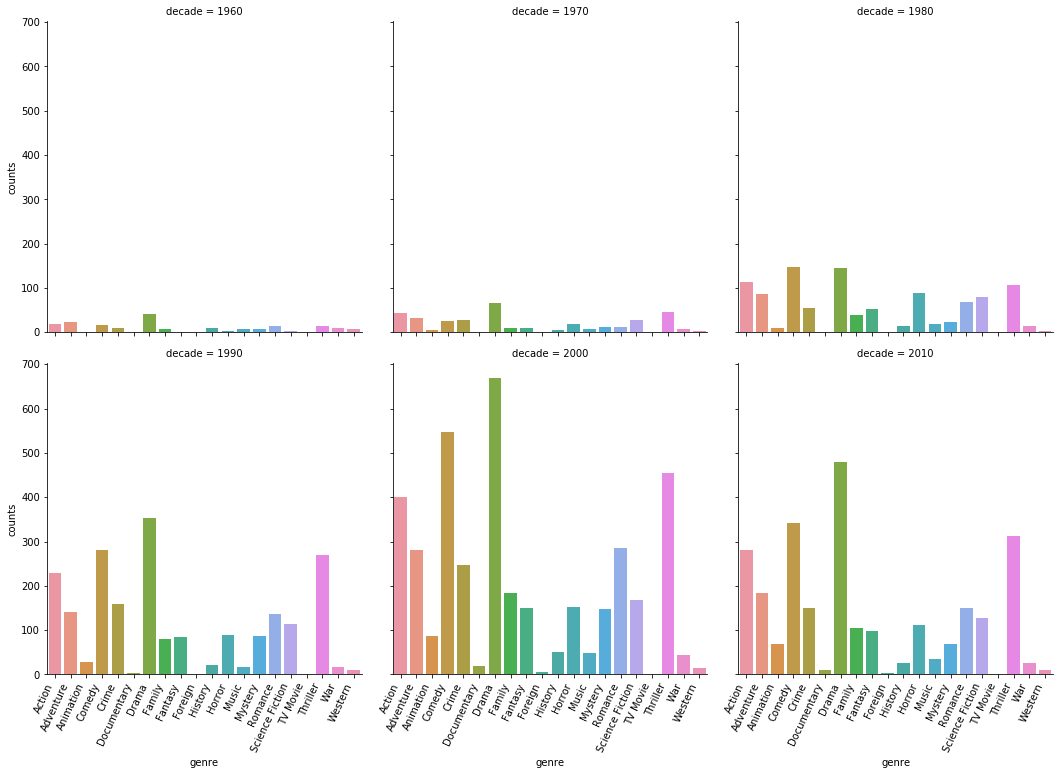

In [286]:
# With all datas prepared, we can build a chart to have a look on them
chart = sns.catplot(data=gfc,x='genre',y='counts',kind='bar',col='decade',col_wrap=3,aspect=1,order=allGenres)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

It seems that Drama to be the main Genre of movies for every decaces, followed 3 Topics : Comedy, Thriller and Action.
This behaviour doesn't seem to have changed since 1980, before that Adventure was also a Genre highly used in Movies.

### Are there any movie which costed more than it generated revenues ?

In [287]:
# Adding a new column in the dataset with the gain generated by the movie (could be a loss too)
df['gain'] = df['revenue'] - df['budget']

In [288]:
# Building a dataset with gain below 0 (loss)
df_loss = df.query('gain < 0')

In [289]:
# Retrieving the minimum gain (max loss) from the dataset
max_loss = df_loss['gain'].min()

In [290]:
# Retrieving the nb of movies which were not profitable
nb_loss, nil = df_loss.shape

In [291]:
# Retrieving the worst movie ever
worstMovieEver = df_loss.query('gain == {}'.format(max_loss))

In [292]:
# Displaying result using print and format
print('About {} movies seems to have not been profitable.\nThe worst movie ever seems to be **{}** which totalised a loss of **{}**'
      .format(
          nb_loss,
          worstMovieEver['original_title'].values[0], 
          worstMovieEver["gain"].values[0] * -1)
     )

About 1072 movies seems to have not been profitable.
The worst movie ever seems to be **The Warrior's Way** which totalised a loss of **413912431**


### What are the 5th most profitable movie ever ( Revenue - Cost ) ?

In [293]:
# Building a dataset with all profitable movies
df_gain = df.query('gain > 0')

In [294]:
# Sorting the dataset against the profit descending (1st results will be the greater profit)
df_5most_profitable_movies = df_gain.sort_values('gain', ascending=False).head(5)

In [295]:
# Having a look at the dataset (chunked to 5 results before)
df_5most_profitable_movies

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,decade,gain
1386,9.432768,237000000,2781505847,Avatar,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2000,2544505847
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,2010,1868178225
5231,4.355219,200000000,1845034188,Titanic,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,1990,1645034188
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,2010,1363528810
4,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,2010,1316249360


In [296]:
print(
    'The 5 most profitable movie from 1960 to 2015 are : \n'
)
i=1
for val in df_5most_profitable_movies['original_title']:
    print('\t#{} : {}'.format(i, val))
    i=i+1

The 5 most profitable movie from 1960 to 2015 are : 

	#1 : Avatar
	#2 : Star Wars: The Force Awakens
	#3 : Titanic
	#4 : Jurassic World
	#5 : Furious 7


###  How the profit made by movies evolve through the year ?

In [297]:
# Transforming gain column in billions
df['gain'] = df['gain'] / pow(10,9)

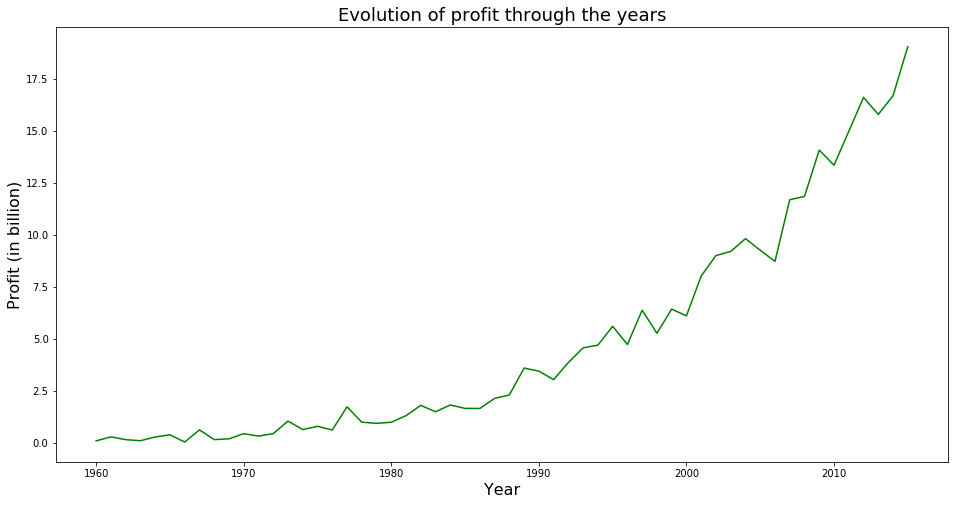

In [298]:
# Building a plot showing the evolution of the profit through the years
df.groupby('release_year')['gain'].sum().plot(kind = 'line', figsize = (16, 8), color = 'g')
plt.ticklabel_format(axis='y', style="plain")
plt.title('Evolution of profit through the years', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Profit (in billion)', fontsize = 16);

It seems that movies are more and more profitable through the years.

<a id="conclusion"></a>
## Conclusions

Movies is a way to entertain the public.
Through the year, the main Genres haven't changed a lot dealing with a lot of Drama, Comedy, Thriller and Adventure.
All movies are not guaranteed to be profitable, but while there are some Flops **The Warrior's Way**, it exists some great success like **Avatar**, **Titanic** (2 Movies by **James Cameron**), **Jurrassic World**.
Finally, it seems that the industry of movie has just started earning a lot of money and it is accelerating.